**Quantile regression** is a type of regression analysis used in statistics and machine learning to estimate the conditional quantiles (such as the median or the 90th percentile) of a response variable given a set of predictor variables. Unlike **ordinary least squares (OLS) regression**, which estimates the **mean** of the dependent variable conditional on the predictors, quantile regression estimates **any chosen quantile**, providing a more comprehensive view of the relationship between variables.

---

### 🔍 **Mathematical Definition**

Given a quantile level $\tau \in (0, 1)$ (e.g., $\tau = 0.5$ for the median), quantile regression solves:

$$
\hat{\beta}_\tau = \arg \min_{\beta} \sum_{i=1}^n \rho_\tau(y_i - x_i^\top \beta)
$$

where $\rho_\tau(u)$ is the **check function**, defined as:

$$
\rho_\tau(u) = u(\tau - \mathbb{I}(u < 0)) =
\begin{cases}
\tau u & \text{if } u \geq 0 \\
(\tau - 1) u & \text{if } u < 0
\end{cases}
$$

This asymmetric loss penalizes over- and under-estimations differently depending on the chosen quantile $\tau$.

---

### 📊 **Why Use Quantile Regression?**

1. **Robust to outliers**: Median regression ($\tau = 0.5$) is robust to outliers in the response variable.
2. **Heteroskedasticity**: Captures how the conditional distribution changes across different quantiles, which is useful when the variance of errors is not constant.
3. **Full distributional modeling**: Useful when you want to understand the impact of covariates across the entire distribution of the outcome, not just the mean.

---

### 🛠️ **Example Use Cases**

* **Economics**: Wage determination—understanding how education affects not only average income but also lower and upper quantiles.
* **Medicine**: Identifying how risk factors affect the lower and upper tails of a biomarker distribution.
* **Meteorology**: Predicting quantiles of temperature or precipitation instead of just average forecasts.

### Example

The following plot illustrates the difference between **quantile regression** and **ordinary least squares (OLS)**:

* The **black line** represents the OLS fit, which models the **mean** of the response variable given the predictors.
* The **colored lines** (blue, green, and orange) represent the **quantile regressions** at the 10th, 50th (median), and 90th percentiles, respectively.

Notice how:

* The OLS line is a single "average" fit through the data.
* Quantile regressions provide a fuller picture of the distribution of $y$ given $X$, especially under **heteroskedasticity** (non-constant variance).

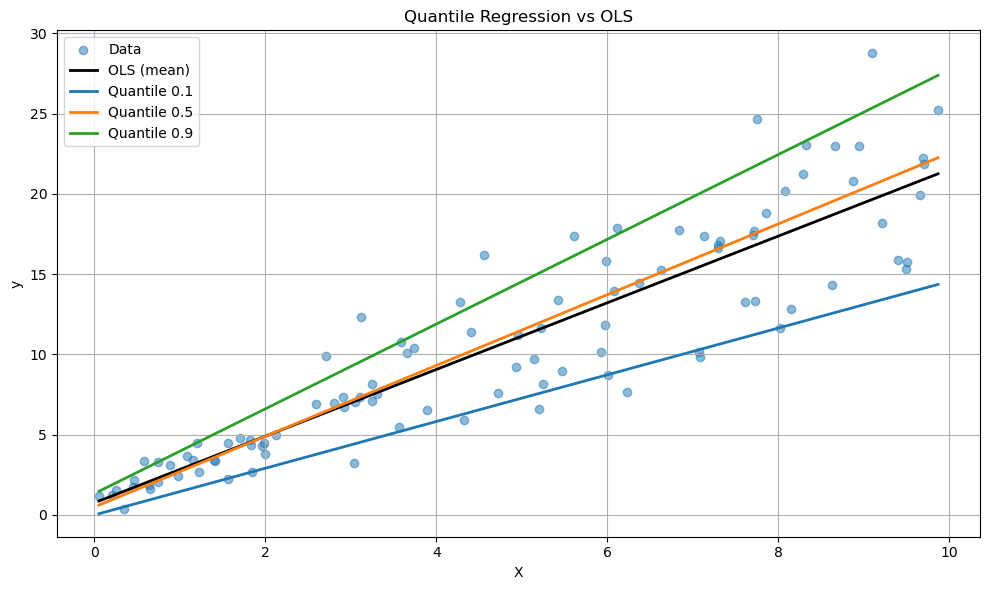

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor, LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * (0.5 + 0.5 * X.squeeze())  # Heteroscedastic noise

# Fit OLS (mean) regression
ols = LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

# Fit quantile regressions
quantiles = [0.1, 0.5, 0.9]
quantile_preds = {}
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0, solver="highs").fit(X, y)
    quantile_preds[q] = qr.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, y_pred_ols, color='black', label='OLS (mean)', linewidth=2)
for q in quantiles:
    plt.plot(X, quantile_preds[q], label=f'Quantile {q:.1f}', linewidth=2)

plt.title("Quantile Regression vs OLS")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# CQR (from scratch)

## Compute $E_i$ values

In [ ]:
def cqr_score(q_low, q_high, y):
    return np.maximum(q_low-y, y-q_high)

(
    cqr_score(1.0, 3.5, 0.0), 
    cqr_score(1.0, 3.5, 1.0), 
    cqr_score(1.0, 3.5, 1.5),
    cqr_score(1.0, 3.5, 3.0), 
    cqr_score(1.0, 3.5, 4.0)
)

(1.0, 0.0, -0.5, -0.5, 0.5)

In [ ]:
# q_low = q_hat_alpha_low_model.predict(sm.add_constant(X_calib))
# q_high = q_hat_alpha_high_model.predict(sm.add_constant(X_calib))

q_low = q_hat_alpha_low_model.predict(X_calib)
q_high = q_hat_alpha_high_model.predict(X_calib)

cqr_scores =  cqr_score(q_low, q_high, y_calib)

In [ ]:
cqr_scores[0]

-1.6651598402412837

In [ ]:
q_low[0], q_high[0], q_low[0]-y_calib[0], y_calib[0]-q_high[0]

(15.699481955096363,
 20.066569733611267,
 -2.70192793827362,
 -1.6651598402412837)

In [ ]:
cqr_scores

array([-1.66515984e+00,  7.95941858e+00, -7.58524440e-01,  1.24253569e+01,
        9.96793412e+00, -1.66055084e+00, -1.30373098e+00, -9.68435103e-02,
        2.59160623e+01,  1.87508815e+01,  1.44374712e+01,  3.02507104e+01,
        3.23979552e+01,  5.94037030e+00,  2.71423613e+01,  1.02314965e+01,
        2.24861874e-01,  1.02289556e+00,  1.49532228e+01,  1.56719138e+01,
        6.84876565e+00,  2.04234334e+01,  1.63271504e+00,  6.11074371e+00,
        1.39086654e+01,  2.69446587e+01,  1.73558297e-02,  3.91063004e+01,
        2.24195970e+01, -1.22111580e+00, -3.11515977e+00,  4.13374729e+00,
        1.52058773e+00,  1.68230972e+00,  2.40159708e+01,  4.11264562e+00,
        7.33927736e+00, -1.22877125e+00, -1.58308931e+00,  2.71435806e+01,
        2.68104121e+00,  1.65136917e+00,  3.04494861e-02,  8.61961378e+00,
        1.22620750e+01,  5.14440393e+00,  3.19930299e-01,  2.44990739e+01,
        4.15816803e+00,  1.33080972e+01,  1.67658516e+01,  1.21741342e+01,
        1.28774730e+01,  

In [ ]:
np.sum(cqr_scores >= 0, axis=0)

317

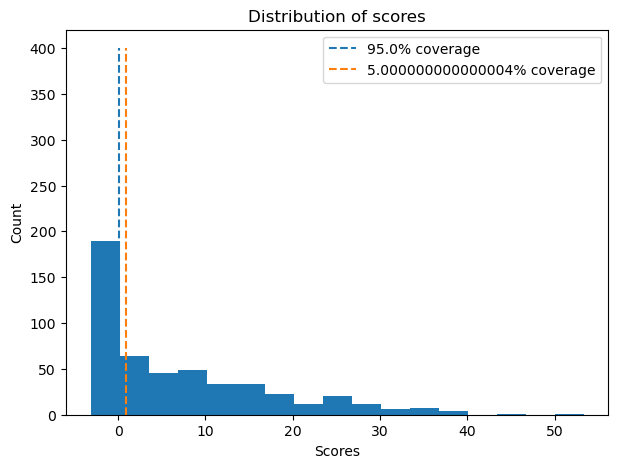

In [ ]:
def plot_scores(alphas, scores, quantiles):
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
    plt.figure(figsize=(7, 5))
    plt.hist(scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=400,
            color=colors[i],
            ls="dashed",
            label=f"{(1-alphas[i])*100}% coverage"
        )
    plt.title("Distribution of scores")
    plt.legend()
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

alpha = [0.05, 0.95]
plot_scores(alpha, cqr_scores, alpha)

## Compute $Q_{1-\alpha}$

In [ ]:
# Compute the 10th percentile (10% empirical quantile)
percentile_10 = np.percentile(cqr_scores, 10)
print("10th percentile (10% empirical quantile):", percentile_10)

10th percentile (10% empirical quantile): -1.3311232202545344


In [ ]:
# Compute the **ADJUSTED** 10th percentile (10% empirical quantile)
percentile_10 = np.quantile(cqr_scores, .1, method = 'lower')
print("10th percentile (10% empirical quantile):", percentile_10)

q_1_minus_alpha = percentile_10

10th percentile (10% empirical quantile): -1.3824625914839743


## Compute conformalized intervals on test set

In [ ]:
q_low = q_hat_alpha_low_model.predict(X_test)
q_high = q_hat_alpha_high_model.predict(X_test)
conformalized_intervals = (q_low-q_1_minus_alpha, q_high+q_1_minus_alpha)

y_pred = qr_median.predict(X_test)

for i in range(5):
    print("%.3f [%.3f;%.3f]" % (y_pred[i], conformalized_intervals[0][i], conformalized_intervals[1][i]))

in_the_range = np.sum((y_test >= q_low) & (y_test <= q_high))
print(in_the_range)

in_the_range = np.sum((y_test >= conformalized_intervals[0]) & (y_test <= conformalized_intervals[1]))
print(in_the_range)


-2.478 [-1.179;2.752]
19.456 [19.334;18.877]
-2.478 [-1.179;2.752]
15.133 [15.180;15.135]
-2.478 [-1.179;2.752]
170
46


In [ ]:
y_pred[:5]

array([-2.47790774, 19.45569859, -2.47790774, 15.1334502 , -2.47790774])

# CQR (via Mapie)

In [ ]:
#!pip install -q mapie

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Defining the quantiles for the models
# Make sure to have the order right: lower, upper, median
alphas = [0.05, 0.95, 0.5]
models = []
for a in alphas:
    m = GradientBoostingRegressor(loss='quantile',alpha=a)
    m.fit(X_train, y_train)
    models.append(m)

In [ ]:
regressor = GradientBoostingRegressor(loss='quantile',alpha=0.1)

In [ ]:
from mapie.regression import MapieQuantileRegressor
mapie = MapieQuantileRegressor(estimator=regressor, alpha=0.1, cv="split")

In [ ]:
mapie.fit(
            X_train, y_train,
            X_calib=X_calib, y_calib=y_calib,
            random_state=42
        )

MapieQuantileRegressor(cv='split',
                       estimator=GradientBoostingRegressor(alpha=0.1,
                                                           loss='quantile'))

In [ ]:
def sort_y_values(y_test, y_pred, y_pis):
    """
    Sorting the dataset in order to make plots using the fill_between function.
    """
    indices = np.argsort(y_test)
    y_test_sorted = np.array(y_test)[indices]
    y_pred_sorted = y_pred[indices]
    y_lower_bound = y_pis[:, 0, 0][indices]
    y_upper_bound = y_pis[:, 1, 0][indices]
    return y_test_sorted, y_pred_sorted, y_lower_bound, y_upper_bound

In [ ]:
y_pred, y_qr = mapie.predict(X_test)

(y_test_sorted, y_pred_sorted, lower_bound, upper_bound) = sort_y_values(y_test, y_pred, y_qr)

coverage = regression_coverage_score(y_test, y_qr[:, 0, 0], y_qr[:, 1, 0])

width = regression_mean_width_score(y_qr[:, 0, 0], y_qr[:, 1, 0])

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/mapie/utils.py:598: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


In [ ]:
import pandas as pd
predictions = pd.DataFrame(y_test)
predictions.columns = ['y_true']
predictions["point prediction"] = y_pred
predictions["lower"] = y_qr.reshape(-1,2)[:,0]
predictions["upper"] = y_qr.reshape(-1,2)[:,1]
# take a quick look
predictions

,y_true,point prediction,lower,upper
0,-34.615559,-2.477908,-26.577574,28.150367
1,27.669770,19.455699,-6.064041,44.275278
2,-8.214475,-2.477908,-26.577574,28.150367
3,16.509240,15.133450,-10.218690,40.533450
4,-34.575156,-2.477908,-26.577574,28.150367
...,...,...,...,...
495,25.299003,19.455699,-6.064041,44.275278
496,-10.634755,-2.477908,-26.577574,28.150367
497,29.234079,19.455699,-6.064041,44.275278
498,3.442401,2.528422,-23.214405,28.150367


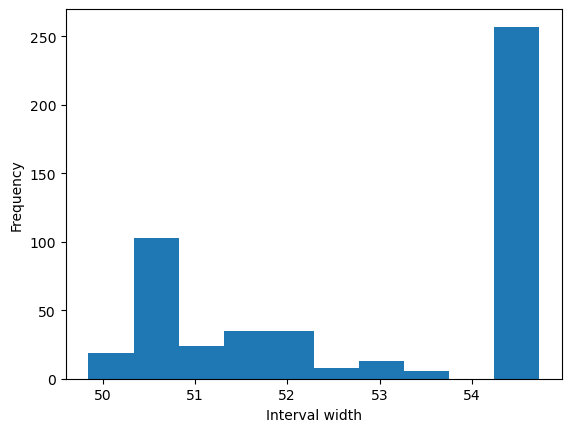

In [ ]:
widths = y_qr[:,1] - y_qr[:,0]
plt.hist(widths)
# Label the x-axis
plt.xlabel("Interval width")
# Label the y-axis
plt.ylabel("Frequency")
plt.show()

In [ ]:
for i in range(5):
    print("%.3f [%.3f;%.3f]" % (y_pred[i], y_qr[i,0], y_qr[i,1]))

-32.447 [-33.727;1.550]
27.702 [12.330;31.361]
-7.614 [-10.052;1.550]
15.708 [12.330;16.874]
-35.013 [-38.039;1.550]


/tmp/ipykernel_17584/465814403.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.3f [%.3f;%.3f]" % (y_pred[i], y_qr[i,0], y_qr[i,1]))


In [ ]:
from mapie.metrics import regression_coverage_score
from mapie.metrics import regression_mean_width_score

size = regression_mean_width_score(y_qr[:,0], y_qr[:,1])
print("Average interval width: {:.2f}".format(size))
cov = regression_coverage_score(y_test, y_qr[:,0], y_qr[:,1])
print("Coverage: {:.2%}".format(cov))

Average interval width: 15.71
Coverage: 90.00%


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/mapie/utils.py:598: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


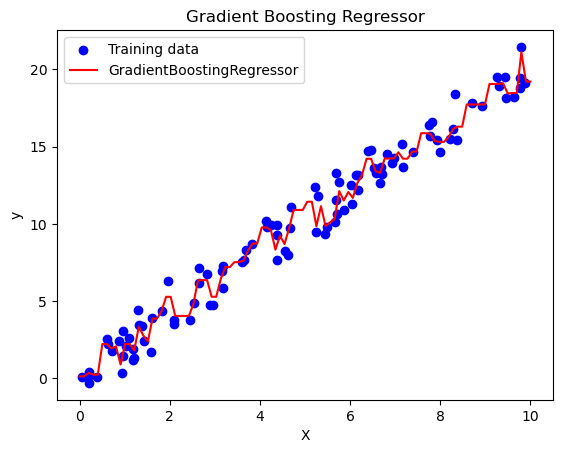

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Generating 100 random numbers between 0 and 10
y = 2 * X.squeeze() + np.random.randn(100)  # Creating target variable with noise

# Fit GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Plotting the data points
plt.scatter(X, y, color='blue', label='Training data')

# Plotting the model predictions
x_values = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = gb_model.predict(x_values)
plt.plot(x_values, y_pred, color='red', label='GradientBoostingRegressor')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regressor')
plt.legend()

# Display the plot
plt.show()
